In [231]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
from urllib.parse import urljoin
from urllib.request import urlopen
from tqdm import tqdm_notebook
import numpy as np
from datetime import datetime, timedelta
import calendar
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name) 

# 크롤링 - url 가져오기

In [2]:
driver = webdriver.Chrome('chromedriver.exe')
url_main = 'https://www.wadiz.kr'
url_sub = '/web/wreward/category?keyword=&endYn=Y&order=recent'
url = url_main+url_sub
#해당 URL로 브라우저 실행
driver.get(url)

In [16]:
soup = bs(driver.page_source, 'html.parser')

In [17]:
set_url = soup.find_all('div', class_='ProjectCardList_list__1YBa2')[0]
# print(set_url)
set_url.find('a')['href']

'/web/campaign/detail/60785'

In [18]:
url_add = []
list_ = soup.find_all('div', class_='CommonCard_container__e_ebQ CommonCard_squareSmall__1Cdkn')
for u in list_:
    url_add.append(urljoin(url_main, u.find('a')['href']))
len(url_add)

3072

In [19]:
url_add

['https://www.wadiz.kr/web/campaign/detail/60785',
 'https://www.wadiz.kr/web/campaign/detail/60293',
 'https://www.wadiz.kr/web/campaign/detail/61942',
 'https://www.wadiz.kr/web/campaign/detail/63346',
 'https://www.wadiz.kr/web/campaign/detail/56530',
 'https://www.wadiz.kr/web/campaign/detail/42568',
 'https://www.wadiz.kr/web/campaign/detail/61187',
 'https://www.wadiz.kr/web/campaign/detail/62026',
 'https://www.wadiz.kr/web/campaign/detail/60182',
 'https://www.wadiz.kr/web/campaign/detail/61151',
 'https://www.wadiz.kr/web/campaign/detail/61744',
 'https://www.wadiz.kr/web/campaign/detail/61939',
 'https://www.wadiz.kr/web/campaign/detail/56806',
 'https://www.wadiz.kr/web/campaign/detail/59918',
 'https://www.wadiz.kr/web/campaign/detail/62265',
 'https://www.wadiz.kr/web/campaign/detail/61155',
 'https://www.wadiz.kr/web/campaign/detail/62103',
 'https://www.wadiz.kr/web/campaign/detail/60788',
 'https://www.wadiz.kr/web/campaign/detail/57582',
 'https://www.wadiz.kr/web/camp

In [20]:
Wadiz_info = {'URL':url_add}
Wadiz = pd.DataFrame(Wadiz_info)
Wadiz.set_index('URL', inplace = True)

In [22]:
Wadiz.head()

""
URL
https://www.wadiz.kr/web/campaign/detail/60785
https://www.wadiz.kr/web/campaign/detail/60293
https://www.wadiz.kr/web/campaign/detail/61942
https://www.wadiz.kr/web/campaign/detail/63346
https://www.wadiz.kr/web/campaign/detail/56530


In [97]:
Wadiz.to_csv('Wadiz_url.csv', encoding='utf-8') #가져온 url csv파일로 저장

In [104]:
Wadiz_url= pd.read_csv('Wadiz_url.csv') 
Wadiz_url.head()

,URL
0,https://www.wadiz.kr/web/campaign/detail/61893
1,https://www.wadiz.kr/web/campaign/detail/59373
2,https://www.wadiz.kr/web/campaign/detail/60784
3,https://www.wadiz.kr/web/campaign/detail/60973
4,https://www.wadiz.kr/web/campaign/detail/61732


In [26]:
# Wadiz_url = Wadiz_url.iloc[845:,:] 
# Wadiz_url

In [27]:
# Wadiz_url = Wadiz_url.iloc[247:,:]
# Wadiz_url

In [30]:
# Wadiz_url = Wadiz_url.iloc[496:,:]
# Wadiz_url

In [31]:
# Wadiz_url =  Wadiz_url.iloc[659:,:]
# Wadiz_url

In [32]:
# Wadiz_url = Wadiz_url.iloc[236:,:]
# Wadiz_url

In [33]:
# Wadiz_url = Wadiz_url.iloc[402:,:]
# Wadiz_url

In [34]:
# Wadiz_url = Wadiz_url.iloc[66:,:]
# Wadiz_url

In [35]:
# Wadiz_url = Wadiz_url.iloc[658:,:]
# Wadiz_url

In [36]:
# Wadiz_url = Wadiz_url.iloc[51:,:]
# Wadiz_url

In [37]:
# Wadiz_url = Wadiz_url.iloc[327:,:]
# Wadiz_url

In [38]:
# Wadiz_url = Wadiz_url.iloc[103:,:]
# Wadiz_url

In [105]:
Wadiz_url.reset_index(drop=True, inplace = True)

In [106]:
Wadiz_url['URL'][0]

'https://www.wadiz.kr/web/campaign/detail/61893'

In [107]:
Wadiz_url.index

RangeIndex(start=0, stop=4126, step=1)

# 웹 크롤링

In [ ]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get(Wadiz_url['URL'][0])

In [263]:
price_1 = []
price_2 = []
items = []
hearts = []
goals = []
tags = []
supports = []
g_ps = []
p_ts = []
s_ts = []
s_ts2 =[]
s_ts3 =[]
ss_ts = []
names = []

mean_prices = []
max_prices = []
min_prices = []
ships = []
dates = []

펀딩s = []
지지서명s = []
팔로워s = []
팔로잉s = []

for i in tqdm_notebook(range(len(Wadiz_url))):
    driver.get(Wadiz_url['URL'][i])
    soup_url = bs(driver.page_source, 'html.parser')
    time.sleep(0.5)

    tag = soup_url.select_one('div.reward-header > p > em').text   # 카테코리
#     item = soup_url.select_one('p >em +strong').text[1:]    # 상품명
    item = soup_url.select('h2 > a')[0].text
    get_1 = soup_url.find('p', class_='achievement-rate').text   # 달성률
    get_2 = soup_url.find('p', class_ = 'total-amount').text[:-3]   # 후원금액

    펀 = soup_url.select_one('div > div:nth-child(4) > div > p').text.split("펀")
    g_p = 펀[0]
    p_t = 펀[1]
    g_p1 = g_p.replace("목표 금액 ","")  # 목표금액
    p_t1 = p_t.replace("딩기간 ","")   
    s_t1 = p_t1.split("-")
    s_t2 = s_t1[0]    # 시작날
    s_t3 = s_t1[1]    # 끝난날
    ss_t2 = datetime.datetime.strptime(s_t2, '%Y.%m.%d').date()
    ss_t3 = datetime.datetime.strptime(s_t3, '%Y.%m.%d').date()
    ss_t4 = (ss_t3-ss_t2).days

    heart = soup_url.find("em", class_='cnt-like').text   # 좋아요
    support = soup_url.select_one('p.total-supporter > strong').text   # 서포터즈

    name = soup_url.select_one('dl > dd > p.name > a').text  # 메이커 이름

    length = soup_url.select('div.top-info > dl.reward-info > dt')
    prices = []
    for index in range(len(length)):
        price = soup_url.select('div.top-info > dl.reward-info > dt')[index].text   # 펀딩가격
        ship = soup_url.select('div > ul > li.shipping > em')[index].text  # 배송비
        date = soup_url.select('div > ul > li.date > em')[index].text   # 발송일
        pr = int(price.replace(",","").replace("원 펀딩",""))
        prices.append(pr)

    ## 메이커정보 ##
    time.sleep(2)
    driver.find_element_by_css_selector("div.maker-info > dl > dt > button").click()
    time.sleep(2)
    sub_soup = bs(driver.page_source, 'html.parser')
    profile = sub_soup.select("div > ul.activity-list > li strong")
    펀딩 = profile[0].text
    지지서명 = profile[1].text
    팔로워 = profile[2].text
    팔로잉 = profile[3].text


    mean_prices.append(np.mean(prices))
    max_prices.append(np.max(prices))
    min_prices.append(np.min(prices))
    ships.append(ship)
    dates.append(date)
    names.append(name)

    price_1.append(get_1)
    price_2.append(get_2)
    items.append(item)
    hearts.append(heart)
    g_ps.append(g_p1)
    p_ts.append(p_t1)
    s_ts.append(s_t1)
    s_ts2.append(s_t2)
    s_ts3.append(s_t3)
    ss_ts.append(ss_t4)
    tags.append(tag)
    supports.append(support)

    펀딩s.append(펀딩)
    지지서명s.append(지지서명)
    팔로워s.append(팔로워)
    팔로잉s.append(팔로잉)

C:\Users\USER-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [264]:
Ms = []    # 펀딩평균
for mean_p in mean_prices:
    M = format(mean_p, '.2f')
    Ms.append(M)

In [267]:
error_list = ['\xa0']
for st in error_list:
    for i in range(len(price_1)):
        tags[i] = tags[i].replace(st,"")
        items[i] = items[i].replace(st,"")
        names[i] = names[i].replace(st,"")
        price_2[i] = price_2[i].replace(st,"")
        g_ps[i] = g_ps[i].replace(st,"")
        price_1[i] = price_1[i].replace(st,"")
        Ms[i] = Ms[i].replace(st,"")
        ships[i] = ships[i].replace(st,"")
        dates[i] = dates[i].replace(st,"")
        s_ts2[i] = s_ts2[i].replace(st,"")
        s_ts3[i] = s_ts3[i].replace(st,"")
        hearts[i] = hearts[i].replace(st,"")
        supports[i] = supports[i].replace(st,"")
        펀딩s[i] = 펀딩s[i].replace(st,"")
        지지서명s[i] = 지지서명s[i].replace(st,"")
        팔로워s[i] = 팔로워s[i].replace(st,"")
        팔로잉s[i] = 팔로잉s[i].replace(st,"")

In [268]:
len(price_1),len(price_2),len(items),len(hearts),len(g_ps),len(ss_ts),len(s_ts2),len(s_ts3),len(tags),len(supports)

(36, 36, 36, 36, 36, 36, 36, 36, 36, 36)

In [269]:
Wadiz_sub_info = {'카테고리':tags, '상품명':items, "메이커이름":names, '후원금액':price_2, '목표금액':g_ps, '달성률':price_1, "평균펀딩":Ms, "최고펀딩":max_prices,"최저펀딩":min_prices, "배송비":ships, "발송시작일":dates, "시작날":s_ts2, "끝난날":s_ts3, '기간':ss_ts, '좋아요':hearts,'서포터즈':supports, "펀딩":펀딩s,"지지서명":지지서명s,"팔로워":팔로워s,"팔로잉":팔로잉s}

In [ ]:
Wadiz_sub = pd.DataFrame(Wadiz_sub_info)

In [271]:
Wadiz_sub

,카테고리,상품명,메이커이름,후원금액,목표금액,달성률,평균펀딩,최고펀딩,최저펀딩,배송비,발송시작일,시작날,끝난날,기간,좋아요,서포터즈,펀딩,지지서명,팔로워,팔로잉
0,홈리빙,두가지 음료를 마시는 재미와 치아건강까지 생각한 [아이듀오 듀얼빨대컵],(주)솔리드네트워크,0원,"500,000원",0% 달성,34800.00,63500,19900,"3,000원",2019년 10월 초 (1~10일) 예정,2019.09.11,2019.09.29,18,62,0,-,0,0,0
1,푸드,[앵콜] 어디든 뿌리면 맛있어지는 '0칼로리 시즈닝',ZERO BASED,"5,532,400원","500,000원",1106% 달성,37466.67,54500,11900,0원,2019년 10월 초 (1~10일) 예정,2019.09.11,2019.09.29,18,184,199,-,0,1,0
2,뷰티,"[@@샴푸유목민 주목@@]내 머리에 맞는 샴푸, 에일샴푸",에일 AYLE,"1,034,900원","1,000,000원",103% 달성,23233.33,30900,15900,0원,2019년 11월 초 (1~10일) 예정,2019.09.11,2019.10.24,43,58,51,4,2,0,0
3,반려동물,"강아지 행동교정, pupping 캠페인 아크릴 키링",더독캣,"502,500원","500,000원",100% 달성,14600.00,28000,5000,"2,500원",2019년 10월 중순 (11~20일) 예정,2019.09.11,2019.09.30,19,10,33,3,2,0,1
4,교육·키즈,"세상에 단 하나 뿐인, 태명 자수 커스텀 배냇저고리 SEASON #2",peachgray_studio,"778,000원","500,000원",155% 달성,60000.00,105000,25000,0원,2019년 10월 초 (1~10일) 예정,2019.09.10,2019.09.23,13,14,31,1,0,2,0
5,교육·키즈,"내 방 가득 채우는 나만의 부산, 부산컬러링맵",올드뉴스,"235,000원","1,000,000원",23% 달성,46000.00,150000,7000,0원,2019년 10월 초 (1~10일) 예정,2019.09.10,2019.09.29,19,11,12,3,0,0,0
6,패션·잡화,세상에 없던 패션아이템 : 백드롭백[Backdropbag],Yesn't,"434,000원","500,000원",86% 달성,49571.43,83000,4000,0원,2019년 10월 초 (1~10일) 예정,2019.09.10,2019.09.22,12,42,35,2,0,1,0
7,스포츠·모빌리티,라이더를 위한 배터리 | 이제 라이딩 중 배터리 걱정 NO [휠스윙],주식회사 위드어스,"12,405,500원","1,000,000원",1240% 달성,375575.00,950000,89000,"3,000원",2019년 10월 말 (21~말일) 예정,2019.09.10,2019.09.24,14,147,106,-,0,2,0
8,테크·가전,굿밤을 위한 필수템 [수면호흡 측정기 빗밴드],(주)엠프로스,"11,864,000원","1,000,000원",1186% 달성,85250.00,119000,69000,"2,000원",2019년 12월 중순 (11~20일) 예정,2019.09.10,2019.10.06,26,64,126,-,0,5,1
9,패션·잡화,'위로'를 입으세요. 메시지 트렌치코트 by 소어리움,소어리움,"1,260,000원","1,000,000원",126% 달성,171000.00,259000,139000,"3,500원",2019년 10월 말 (21~말일) 예정,2019.09.10,2019.10.06,26,33,34,3,5,4,0


In [272]:
#12번 나누어 저장, 크롤링 과정 중 누락된 프로젝트가 다소 있음
Wadiz_sub.to_csv('Wadiz36_12.csv', encoding='euc-kr')

# 데이터 합친 후 저장

In [444]:
a = pd.read_csv("Wadiz845_1.csv", encoding ="euc-kr")
b = pd.read_csv("Wadiz246_2.csv", encoding ="euc-kr")
c = pd.read_csv("Wadiz495_3.csv", encoding ="euc-kr")
d = pd.read_csv("Wadiz659_4.csv", encoding ="euc-kr")
e = pd.read_csv("Wadiz235_5.csv", encoding ="euc-kr")
f = pd.read_csv("Wadiz401_6.csv", encoding ="euc-kr")
g = pd.read_csv("Wadiz65_7.csv", encoding ="euc-kr")
h = pd.read_csv("Wadiz657_8.csv", encoding ="euc-kr")
i = pd.read_csv("Wadiz50_9.csv", encoding ="euc-kr")
j = pd.read_csv("Wadiz326_10.csv", encoding ="euc-kr")
k = pd.read_csv("Wadiz103_11.csv", encoding ="euc-kr")
l = pd.read_csv("Wadiz36_12.csv", encoding ="euc-kr")

In [445]:
res_wadiz = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l]) #concat

In [446]:
res_wadiz.drop(['Unnamed: 0'],axis = 1, inplace = True) #불필요컬럼 삭제
res_wadiz.reset_index(drop = True, inplace = True) #reset index

In [447]:
res_wadiz.to_csv('res_wadiz.csv',encoding = "euc-kr") #합쳐진 상태로 저장

# 데이터 전처리

In [318]:
res_wadiz = pd.read_csv('res_wadiz.csv',encoding = 'euc-kr') #저장한 csv 불러오기
res_wadiz.drop(['Unnamed: 0'],axis = 1, inplace = True) #불필요컬럼 삭제

In [319]:
res_wadiz.head()

,카테고리,상품명,메이커이름,후원금액,목표금액,달성률,평균펀딩,최고펀딩,최저펀딩,배송비,발송시작일,시작날,끝난날,기간,좋아요,서포터즈,펀딩,지지서명,팔로워,팔로잉
0,디자인소품,접었다 폈다 실용적이고 유니크한 폴더블 머니클립&카드지갑,블랑쉐나인,"98,000원","500,000원",19% 달성,44000.00,49000,39000,0원,2020년 03월 말 (21~말일) 예정,2020.03.10,2020.03.16,6,22,5,-,0,2,0
1,푸드,미래형 흑마늘! 이 작은 스틱 1포에 5쪽을 담았습니다. #맛있어요,(주)휴럼,"10,126,300원","500,000원",2025% 달성,36625.00,59800,15000,0원,2020년 03월 중순 (11~20일) 예정,2020.03.09,2020.03.16,7,96,198,7,0,40,0
2,푸드,"달콤한 봄을 위해, 자연에서 온 100% 자연 꿀 한 스푼 어떠신가요?",LADEATS,"3,372,000원","500,000원",674% 달성,53500.00,69000,38000,0원,2020년 03월 말 (21~말일) 예정,2020.03.09,2020.03.15,6,57,72,5,0,13,0
3,패션·잡화,"봄바람에 흔들리는, 롱 드롭 귀걸이 14K 골드 [3월의 보민당]",보민당,"1,944,000원","500,000원",388% 달성,92875.00,105000,83000,0원,2020년 03월 말 (21~말일) 예정,2020.03.09,2020.03.16,7,28,20,-,0,0,0
4,반려동물,[앵콜] 우리 냥이야!! 높게~ 더높게 맘껏 긁어라!! W수직스크래쳐,우드빌드,"3,187,000원","500,000원",637% 달성,37833.33,57000,12000,"4,000원",2020년 03월 말 (21~말일) 예정,2020.03.06,2020.03.15,9,78,58,-,0,2,0


In [320]:
#펀딩 달성률 전처리
cnt = 0
suc = []
for i in range(len(res_wadiz)) :
    suc.append(int(res_wadiz.loc[:,'달성률'][i].split()[0][:-1]))
    if int(res_wadiz.loc[:,'달성률'][i].split()[0][:-1]) < 100 :
        cnt += 1

        
res_wadiz.drop(['달성률'],axis = 1,inplace=True) #기존 달성률 컬럼 삭제
res_wadiz['달성률'] = suc #int형 달성률 컬럼 생성

In [321]:
1 - cnt / len(res_wadiz)  # 펀딩 성공률 약 85%    

0.8491986401165614

In [322]:
#후원금액 전처리
spo = []
for i in range(len(res_wadiz)) :
    spo.append(int(''.join(res_wadiz.loc[:,'후원금액'][i][:-2].split(','))))

res_wadiz.drop(['후원금액'],axis = 1,inplace=True) #기존 후원금액 컬럼 삭제
res_wadiz['후원금액'] = spo #int형 후원금액 컬럼 생성

In [323]:
#목표금액 전처리
goa = []
for i in range(len(res_wadiz)) :
    goa.append(int(''.join(res_wadiz.loc[:,'목표금액'][i][:-4].split(','))))

res_wadiz.drop(['목표금액'],axis = 1,inplace=True) #기존 목표금액 컬럼 삭제
res_wadiz['목표금액'] = goa #int형 목표금액 컬럼 생성

In [324]:
#배송비 전처리
shi = []
for i in range(len(res_wadiz)) :
    shi.append(int(res_wadiz.loc[:,'배송비'][i].replace('원','').replace(',','')))

res_wadiz.drop(['배송비'],axis = 1,inplace=True) #기존 배송비 컬럼 삭제
res_wadiz['배송비'] = shi #int형 배송비 컬럼 생성

In [325]:
#후원금액 전처리
ter = []
for i in range(len(res_wadiz)) :
    ter.append(int(res_wadiz.loc[:,'끝난날'][i].replace('.','')) - int(res_wadiz.loc[:,'시작날'][i].replace('.','')) + 1)

res_wadiz.drop(['기간'],axis = 1,inplace=True) #기존 기간 컬럼 삭제
res_wadiz['기간'] = ter # 기간 컬럼 생성

In [326]:
#파생변수 기간 생성
ter = []
end_li = []
for i in range(len(res_wadiz)) :
    end = datetime(int(res_wadiz.loc[:,'끝난날'][i].split('.')[0]),int(res_wadiz.loc[:,'끝난날'][i].split('.')[1]),int(res_wadiz.loc[:,'끝난날'][i].split('.')[2]))
    sta = datetime(int(res_wadiz.loc[:,'시작날'][i].split('.')[0]),int(res_wadiz.loc[:,'시작날'][i].split('.')[1]),int(res_wadiz.loc[:,'시작날'][i].split('.')[2]))
    ter.append((end - sta + timedelta(days = 1)).days)
    end_li.append(end)
    
res_wadiz['기간'] = ter #끝난날 - 시작날의 값으로 만든 int형 기간 컬럼 생성

In [327]:
#서포터즈 전처리
sup = []
for i in range(len(res_wadiz)) :
    sup.append(int(res_wadiz.loc[:,'서포터즈'][i].replace(',','')))
    
res_wadiz.drop(['서포터즈'],axis = 1,inplace=True) #기존 서포터즈 컬럼 삭제
res_wadiz['서포터즈'] = sup #int형 서포터즈 컬럼 생성

In [328]:
#펀딩참여횟수 전처리
tim = []
for i in range(len(res_wadiz)) :
    tim.append(int(res_wadiz.loc[:,'펀딩'][i].replace('-','0').replace(',','')))
    
res_wadiz.drop(['펀딩'],axis = 1,inplace=True) #기존 펀딩 컬럼 삭제
res_wadiz['펀딩참여횟수'] = tim #int형 펀딩 컬럼 생성

In [329]:
#초는 10 / 중순은 20 / 말은 해당 월의 말일로 바꿔줌
deli = []
for i in range(len(res_wadiz)) :
    a = int(res_wadiz.loc[:,'발송시작일'][i].split()[0].replace('년',''))
    b = int(res_wadiz.loc[:,'발송시작일'][i].split()[1].replace('월',''))
    if '초' in res_wadiz.loc[:,'발송시작일'][i].split()[2] :
        c = int(res_wadiz.loc[:,'발송시작일'][i].split()[2].replace('초','10'))
    elif '중순' in res_wadiz.loc[:,'발송시작일'][i].split()[2] :
        c = int(res_wadiz.loc[:,'발송시작일'][i].split()[2].replace('중순','20'))
    elif '말' in res_wadiz.loc[:,'발송시작일'][i].split()[2] : 
        c = int(res_wadiz.loc[:,'발송시작일'][i].split()[2].replace('말',str(calendar.monthrange(a,b)[1])))
    deli.append(datetime(a,b,c))

#파생변수 배송까지기간 컬럼 생성(발송시작일 - 펀딩종료일)    
fftd = []
for i in range(len(res_wadiz)) :
    fftd.append((deli[i] - end_li[i]).days)
    
res_wadiz.drop(['발송시작일'],axis = 1,inplace=True) #기존 발송시작일 컬럼 삭제
res_wadiz['배송까지기간'] = fftd #int형 배송까지기간 컬럼 생성

In [330]:
#파생변수 월과 계절 컬럼 생성
mon = []
sea = []
for i in range(len(res_wadiz)) :
    if int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 1 :
        temp1 = '1월'
        temp2 = '겨울'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 2 :
        temp1 = '2월'
        temp2 = '겨울'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 3 :
        temp1 = '3월'
        temp2 = '봄'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 4 :
        temp1 = '4월'
        temp2 = '봄'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 5 :
        temp1 = '5월'
        temp2 = '봄'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 6 :
        temp1 = '6월'
        temp2 = '여름'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 7 :
        temp1 = '7월'
        temp2 = '여름'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 8 :
        temp1 = '8월'
        temp2 = '여름'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 9 :
        temp1 = '9월'
        temp2 = '가을'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 10 :
        temp1 = '10월'
        temp2 = '가을'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 11 :
        temp1 = '11월'
        temp2 = '가을'
    elif int(res_wadiz.loc[:,'시작날'][i].split('.')[1]) == 12 :
        temp1 = '12월'
        temp2 = '겨울'
    mon.append(temp1)
    sea.append(temp2)

res_wadiz.drop(['시작날'],axis = 1,inplace=True) #기존 시작날 컬럼 삭제
res_wadiz.drop(['끝난날'],axis = 1,inplace=True) #기존 끝난날 컬럼 삭제
res_wadiz['월'] = mon #월 컬럼 생성
res_wadiz['계절'] = sea #계절 컬럼 생성

In [331]:
#y로 사용할 0과 1의 달성유무 컬럼 생성
ach = []
for i in range(len(res_wadiz)) :
    if res_wadiz.loc[:,'달성률'][i] > 100 : 
        ach.append(1)
    else :
        ach.append(0)
        
#달성유무 컬럼 생성
res_wadiz['달성유무'] = ach    

In [332]:
res_wadiz.head()

,카테고리,상품명,메이커이름,평균펀딩,최고펀딩,최저펀딩,좋아요,지지서명,팔로워,팔로잉,...,후원금액,목표금액,배송비,기간,서포터즈,펀딩참여횟수,배송까지기간,월,계절,달성유무
0,디자인소품,접었다 폈다 실용적이고 유니크한 폴더블 머니클립&카드지갑,블랑쉐나인,44000.00,49000,39000,22,0,2,0,...,98000,500000,0,7,5,0,15,3월,봄,0
1,푸드,미래형 흑마늘! 이 작은 스틱 1포에 5쪽을 담았습니다. #맛있어요,(주)휴럼,36625.00,59800,15000,96,0,40,0,...,10126300,500000,0,8,198,7,4,3월,봄,1
2,푸드,"달콤한 봄을 위해, 자연에서 온 100% 자연 꿀 한 스푼 어떠신가요?",LADEATS,53500.00,69000,38000,57,0,13,0,...,3372000,500000,0,7,72,5,16,3월,봄,1
3,패션·잡화,"봄바람에 흔들리는, 롱 드롭 귀걸이 14K 골드 [3월의 보민당]",보민당,92875.00,105000,83000,28,0,0,0,...,1944000,500000,0,8,20,0,15,3월,봄,1
4,반려동물,[앵콜] 우리 냥이야!! 높게~ 더높게 맘껏 긁어라!! W수직스크래쳐,우드빌드,37833.33,57000,12000,78,0,2,0,...,3187000,500000,4000,10,58,0,16,3월,봄,1


In [333]:
ori_wadiz = res_wadiz.copy()

In [334]:
#달성률과의 상관관계가 0.05이상인 컬럼 
cormat = ori_wadiz.corr()
top_corr_feature = cormat.index[abs(cormat['달성률'])>0.05]
top_corr_feature

Index(['좋아요', '팔로워', '팔로잉', '달성률', '후원금액', '목표금액', '기간', '서포터즈', '펀딩참여횟수',
       '달성유무'],
      dtype='object')

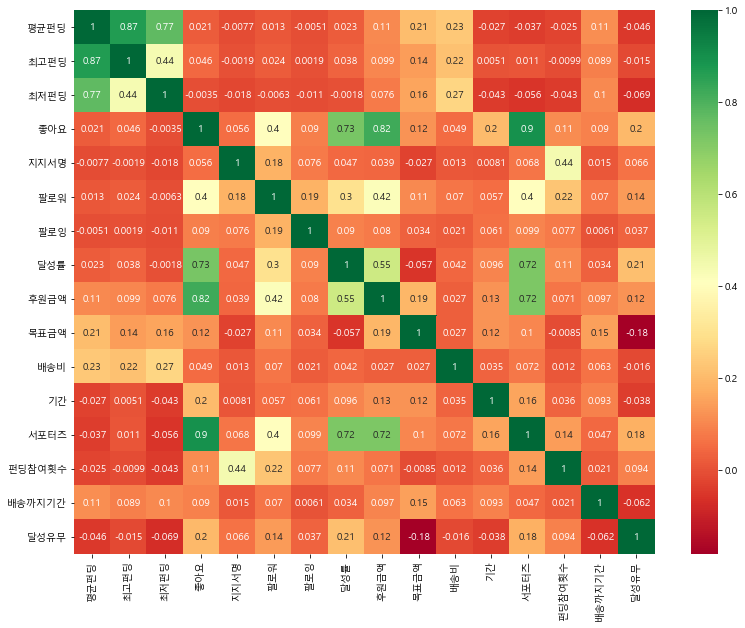

In [335]:
#히트맵
plt.figure(figsize = (13,10))
g = sns.heatmap(res_wadiz.corr(), annot = True, cmap = "RdYlGn")

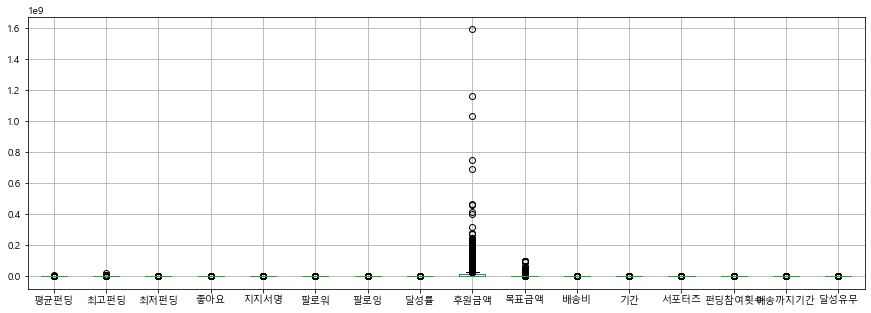

In [360]:
#boxplot
res_wadiz.boxplot(figsize = (15,5))

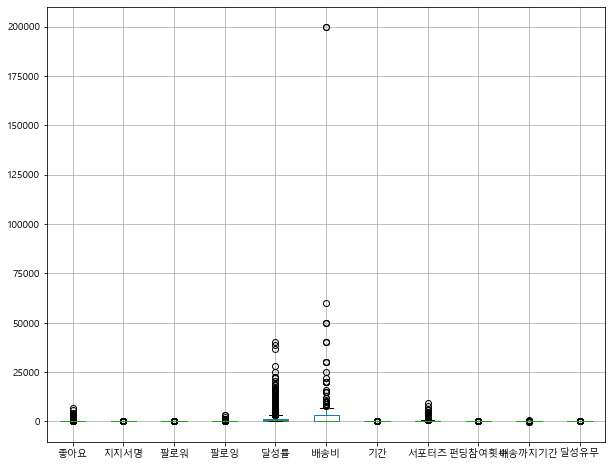

In [363]:
#boxplot
res_wadiz.drop(['후원금액','목표금액','평균펀딩','최고펀딩','최저펀딩'],axis = 1).boxplot(figsize = (10,8))

# 머신러닝

## 1-1. 달성률, 후원금액을 제외한 모든 컬럼 사용
- 사용 컬럼 : 평균펀딩, 최고펀딩, 최저펀딩, 종아요, 지지서명, 팔로워, 팔로잉, 목표금액, 배송비, 기간, 서포터즈, 펀딩참여횟수, 배송까지 기간, 카테고리, 월, 계절

In [274]:
y = res_wadiz['달성유무'] # y설정
res_wadiz.drop(['달성유무'],axis = 1,inplace=True) #달성유무 컬럼 삭제

In [275]:
one_category = pd.get_dummies(res_wadiz['카테고리']) #카테고리 원핫인코딩
res_wadiz.drop(['카테고리'],axis = 1,inplace=True) #기존 카테고리 컬럼 삭제
res_wadiz = pd.concat([res_wadiz, one_category],axis = 1) #concat

In [276]:
res_wadiz.drop(['상품명'],axis = 1,inplace=True) #상품명 컬럼 삭제

In [277]:
res_wadiz.drop(['메이커이름'],axis = 1,inplace=True) #메이커이름 컬럼 삭제

In [278]:
one_mon = pd.get_dummies(res_wadiz['월']) #월 컬럼 원핫인코딩
res_wadiz.drop(['월'],axis = 1,inplace=True) #기존 월 컬럼 삭제
res_wadiz = pd.concat([res_wadiz, one_mon],axis = 1) #concat

In [279]:
one_sea = pd.get_dummies(res_wadiz['계절']) #계절 컬럼 원핫인코딩
res_wadiz.drop(['계절'],axis = 1,inplace=True) #기존 계절 컬럼 삭제
res_wadiz = pd.concat([res_wadiz, one_sea],axis = 1) #concat

In [280]:
res_wadiz.drop(['달성률'],axis = 1,inplace=True) #기존 달성률 컬럼 삭제
res_wadiz.drop(['후원금액'],axis = 1,inplace=True) #기존 후원금액 컬럼 삭제

In [281]:
X = res_wadiz

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 95)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3088, 38), (1030, 38), (3088,), (1030,))

In [288]:
#xgboost -> 가장 일반화된 xgb모델 채택
model_xgb = XGBClassifier(random_state=95,max_depth = 1).fit(X_train,y_train)
print("XGB훈련점수 : ",model_xgb.score(X_train,y_train),"\nXGB테스트점수 : ",model_xgb.score(X_test,y_test))

#catboost
model_cat = CatBoostClassifier(random_state=95,logging_level='Silent').fit(X_train,y_train)
print("\nCAT훈련점수 : ",model_cat.score(X_train,y_train),"\nCAT테스트점수 : ",model_cat.score(X_test,y_test))

#randomforest
model_rf = RandomForestClassifier(random_state=95).fit(X_train,y_train)
print("\nRF훈련점수 : ",model_rf.score(X_train,y_train),"\nRF테스트점수 : ",model_rf.score(X_test,y_test))

XGB훈련점수 :  0.9452720207253886 
XGB테스트점수 :  0.9475728155339805

CAT훈련점수 :  0.9912564766839378 
CAT테스트점수 :  0.941747572815534

RF훈련점수 :  1.0 
RF테스트점수 :  0.9359223300970874


In [289]:
#교차검증
cross_val_score(model_xgb, X, y, cv=5).mean()

0.9385627410963915

In [290]:
#분류 평가지표
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       176
           1       0.95      0.98      0.97       854

    accuracy                           0.95      1030
   macro avg       0.93      0.88      0.90      1030
weighted avg       0.95      0.95      0.95      1030



          importance
feature             
반려동물        0.000000
뷰티          0.000000
소셜·캠페인      0.000000
여행·레저       0.000000
출판          0.000000
테크·가전       0.000000
홈리빙         0.000000
겨울          0.000000
10월         0.000000
12월         0.000000
1월          0.000000
2월          0.000000
3월          0.000000
9월          0.000000
가을          0.000000
11월         0.000000
모임          0.000000
봄           0.000000
교육·키즈       0.000000
게임·취미       0.000000
펀딩참여횟수      0.000000
팔로잉         0.000000
배송비         0.000000
스포츠·모빌리티    0.015426
공연·컬쳐       0.015855
지지서명        0.017358
패션·잡화       0.021778
디자인소품       0.022276
최저펀딩        0.023417
기간          0.024262
푸드          0.026320
배송까지기간      0.027926
평균펀딩        0.031675
팔로워         0.047021
최고펀딩        0.054551
목표금액        0.092815
서포터즈        0.205322
좋아요         0.373996


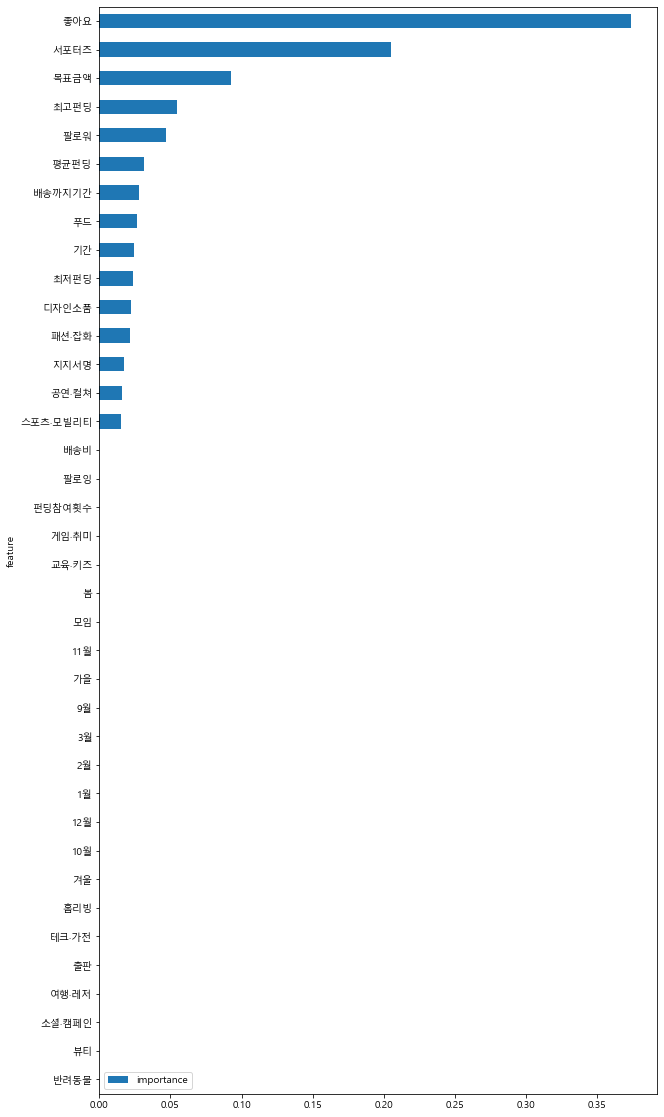

In [291]:
# 컬럼 별 영향력 
feature = pd.DataFrame()
feature['feature'] = X_train.columns
feature['importance'] = model_xgb.feature_importances_

feature.sort_values(by=['importance'],ascending=True,inplace = True)
feature.set_index('feature', inplace=True)
print(feature)
feature.plot(kind='barh', figsize =(10,20))

### 1-2. 다중분류
- 달성률 2000%이상(4), 1000%이상(3), 500%이상(2), 100%이상(1), 100%미만(0) 의 다섯개 분류

In [292]:
ach_li = []
for i in range(len(ori_wadiz)) :
    if ori_wadiz['달성률'][i] >= 2000 : 
        ach_li.append(4)
    elif ori_wadiz['달성률'][i] >= 1000 :
        ach_li.append(3)
    elif ori_wadiz['달성률'][i] >= 500 :
        ach_li.append(2)
    elif ori_wadiz['달성률'][i] >= 100 :
        ach_li.append(1)
    else :
        ach_li.append(0)

In [293]:
y = pd.DataFrame(ach_li)
X = res_wadiz
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 95)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3088, 38), (1030, 38), (3088, 1), (1030, 1))

In [298]:
model_xgb = XGBClassifier(random_state=95,max_depth = 2,reg_alpha =0.1).fit(X_train,y_train)
print("XGB훈련점수 : ",model_xgb.score(X_train,y_train),"\nXGB테스트점수 : ",model_xgb.score(X_test,y_test))

model_cat = CatBoostClassifier(random_state=95,logging_level='Silent').fit(X_train,y_train)
print("\nCAT훈련점수 : ",model_cat.score(X_train,y_train),"\nCAT테스트점수 : ",model_cat.score(X_test,y_test))

model_rf = RandomForestClassifier(random_state=95).fit(X_train,y_train)
print("\nRF훈련점수 : ",model_rf.score(X_train,y_train),"\nRF테스트점수 : ",model_rf.score(X_test,y_test))

XGB훈련점수 :  0.8283678756476683 
XGB테스트점수 :  0.7436893203883496

CAT훈련점수 :  0.9919041450777202 
CAT테스트점수 :  0.7213592233009709

RF훈련점수 :  1.0 
RF테스트점수 :  0.6912621359223301


In [300]:
#교차검증
cross_val_score(model_xgb, X, y, cv=5).mean()

0.7253524283641426

In [301]:
#분류 평가지표
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       172
           1       0.76      0.91      0.83       401
           2       0.58      0.36      0.44       160
           3       0.55      0.58      0.57       142
           4       0.83      0.85      0.84       155

    accuracy                           0.74      1030
   macro avg       0.72      0.69      0.70      1030
weighted avg       0.74      0.74      0.73      1030



          importance
feature             
봄           0.000000
3월          0.000000
10월         0.000000
여행·레저       0.000000
소셜·캠페인      0.000000
모임          0.000000
교육·키즈       0.000000
9월          0.010059
반려동물        0.010075
홈리빙         0.010473
가을          0.010775
출판          0.011675
배송비         0.011854
디자인소품       0.012983
12월         0.013868
게임·취미       0.014864
1월          0.015195
11월         0.016759
뷰티          0.017085
스포츠·모빌리티    0.018852
지지서명        0.019265
테크·가전       0.019307
팔로잉         0.019652
배송까지기간      0.021156
푸드          0.021479
공연·컬쳐       0.023404
2월          0.024154
겨울          0.026777
최저펀딩        0.028245
펀딩참여횟수      0.028433
기간          0.030044
팔로워         0.030286
패션·잡화       0.032170
최고펀딩        0.040194
평균펀딩        0.044095
목표금액        0.068640
서포터즈        0.136098
좋아요         0.212083


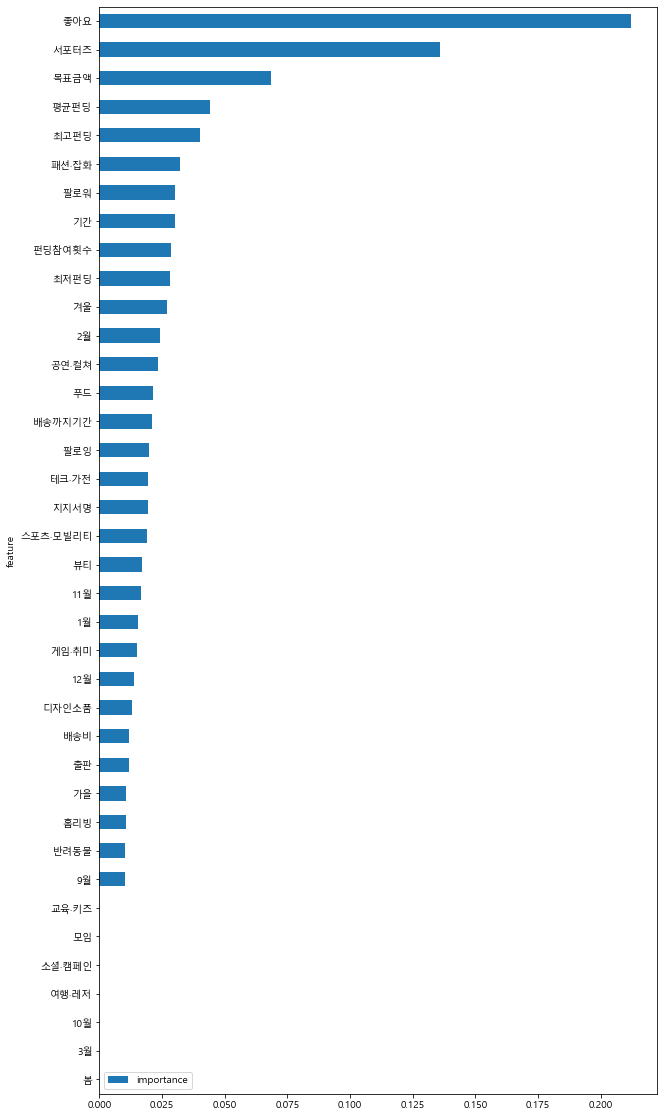

In [302]:
# 컬럼 별 영향력 
feature = pd.DataFrame()
feature['feature'] = X_train.columns
feature['importance'] = model_xgb.feature_importances_

feature.sort_values(by=['importance'],ascending=True,inplace = True)
feature.set_index('feature', inplace=True)
print(feature)
feature.plot(kind='barh', figsize =(10,20))

## 2-1.메이커가 통제할 수 있는 컬럼만을 사용
- 사용 컬럼 : 평균펀딩, 최고펀딩, 최저펀딩, 팔로잉, 목표금액, 배송비, 기간, 서포터즈, 펀딩참여횟수, 배송까지 기간, 카테고리, 월, 계절

In [303]:
res_wadiz2 = res_wadiz.copy()

In [304]:
res_wadiz2.head()

,평균펀딩,최고펀딩,최저펀딩,좋아요,지지서명,팔로워,팔로잉,목표금액,배송비,기간,...,10월,11월,12월,1월,2월,3월,9월,가을,겨울,봄
0,44000.00,49000,39000,22,0,2,0,500000,0,7,...,0,0,0,0,0,1,0,0,0,1
1,36625.00,59800,15000,96,0,40,0,500000,0,8,...,0,0,0,0,0,1,0,0,0,1
2,53500.00,69000,38000,57,0,13,0,500000,0,7,...,0,0,0,0,0,1,0,0,0,1
3,92875.00,105000,83000,28,0,0,0,500000,0,8,...,0,0,0,0,0,1,0,0,0,1
4,37833.33,57000,12000,78,0,2,0,500000,4000,10,...,0,0,0,0,0,1,0,0,0,1


In [305]:
res_wadiz2.drop(['좋아요'],axis = 1,inplace=True) #기존 후원금액 컬럼 삭제
res_wadiz2.drop(['지지서명'],axis = 1,inplace=True) #기존 후원금액 컬럼 삭제
res_wadiz2.drop(['팔로워'],axis = 1,inplace=True) #기존 후원금액 컬럼 삭제

In [306]:
X = res_wadiz2
y = ori_wadiz['달성유무']

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 95)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3088, 35), (1030, 35), (3088,), (1030,))

In [308]:
model_xgb = XGBClassifier(random_state=95,max_depth = 2, gamma = 0.01).fit(X_train,y_train)
print("XGB훈련점수 : ",model_xgb.score(X_train,y_train),"\nXGB테스트점수 : ",model_xgb.score(X_test,y_test))

model_cat = CatBoostClassifier(random_state=95,logging_level='Silent', max_depth= 2).fit(X_train,y_train)
print("\nCAT훈련점수 : ",model_cat.score(X_train,y_train),"\nCAT테스트점수 : ",model_cat.score(X_test,y_test))

model_rf = RandomForestClassifier(random_state=95,max_depth= 10).fit(X_train,y_train)
print("\nRF훈련점수 : ",model_rf.score(X_train,y_train),"\nRF테스트점수 : ",model_rf.score(X_test,y_test))

XGB훈련점수 :  0.9553108808290155 
XGB테스트점수 :  0.9436893203883495

CAT훈련점수 :  0.9433290155440415 
CAT테스트점수 :  0.9466019417475728

RF훈련점수 :  0.967940414507772 
RF테스트점수 :  0.9106796116504854


In [309]:
#교차검증
cross_val_score(model_xgb, X, y, cv=5).mean()

0.9286039118073823

In [310]:
#분류 평가지표
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       176
           1       0.96      0.98      0.97       854

    accuracy                           0.94      1030
   macro avg       0.91      0.88      0.90      1030
weighted avg       0.94      0.94      0.94      1030



          importance
feature             
봄           0.000000
9월          0.000000
3월          0.000000
홈리빙         0.000000
여행·레저       0.000000
게임·취미       0.000000
겨울          0.000000
모임          0.000000
반려동물        0.000000
가을          0.000726
2월          0.002556
푸드          0.012396
스포츠·모빌리티    0.013235
11월         0.013591
12월         0.013845
교육·키즈       0.015058
소셜·캠페인      0.015623
뷰티          0.015671
출판          0.016332
공연·컬쳐       0.017690
펀딩참여횟수      0.017858
기간          0.023772
배송까지기간      0.025621
테크·가전       0.026212
10월         0.026232
1월          0.027574
패션·잡화       0.027679
팔로잉         0.029840
디자인소품       0.033534
배송비         0.038273
최저펀딩        0.041121
평균펀딩        0.061883
최고펀딩        0.067079
목표금액        0.110411
서포터즈        0.306188


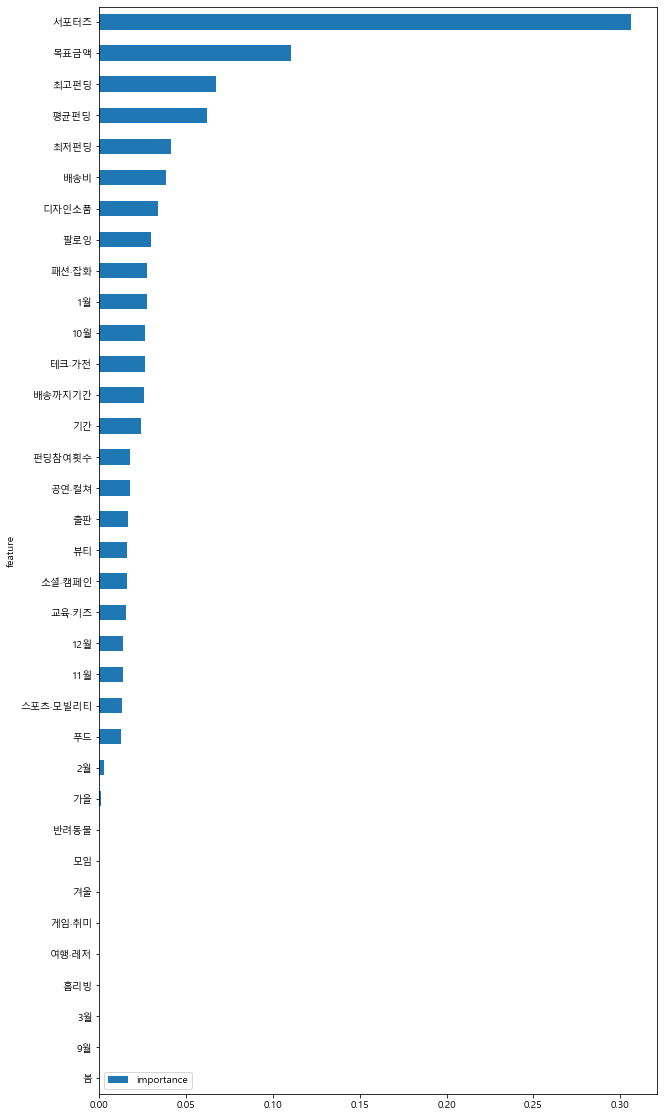

In [311]:
# 컬럼 별 영향력 
feature = pd.DataFrame()
feature['feature'] = X_train.columns
feature['importance'] = model_xgb.feature_importances_

feature.sort_values(by=['importance'],ascending=True,inplace = True)
feature.set_index('feature', inplace=True)
print(feature)
feature.plot(kind='barh', figsize =(10,20))

## 2-2. 메이커가 통제할 수 있는 컬럼만 사용하여 다중분류
- 달성률 2000%이상(4), 1000%이상(3), 500%이상(2), 100%이상(1), 100%미만(0) 의 다섯개 분류

In [312]:
X = res_wadiz2
y = pd.DataFrame(ach_li)

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 95)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3088, 35), (1030, 35), (3088, 1), (1030, 1))

In [314]:
model_xgb = XGBClassifier(random_state=95,max_depth = 2, gamma = 0.01).fit(X_train,y_train)
print("XGB훈련점수 : ",model_xgb.score(X_train,y_train),"\nXGB테스트점수 : ",model_xgb.score(X_test,y_test))

model_cat = CatBoostClassifier(random_state=95,logging_level='Silent', max_depth= 2).fit(X_train,y_train)
print("\nCAT훈련점수 : ",model_cat.score(X_train,y_train),"\nCAT테스트점수 : ",model_cat.score(X_test,y_test))

model_rf = RandomForestClassifier(random_state=95,max_depth= 10).fit(X_train,y_train)
print("\nRF훈련점수 : ",model_rf.score(X_train,y_train),"\nRF테스트점수 : ",model_rf.score(X_test,y_test))

XGB훈련점수 :  0.8102331606217616 
XGB테스트점수 :  0.7320388349514563

CAT훈련점수 :  0.8027849740932642 
CAT테스트점수 :  0.7417475728155339

RF훈련점수 :  0.8261010362694301 
RF테스트점수 :  0.6330097087378641


In [315]:
#교차검증
cross_val_score(model_xgb, X, y, cv=5).mean()

0.7146678030883932

In [316]:
#분류 평가지표
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       172
           1       0.75      0.89      0.81       401
           2       0.56      0.34      0.43       160
           3       0.56      0.58      0.57       142
           4       0.82      0.85      0.84       155

    accuracy                           0.73      1030
   macro avg       0.71      0.68      0.69      1030
weighted avg       0.72      0.73      0.72      1030



          importance
feature             
봄           0.000000
3월          0.000000
10월         0.000000
여행·레저       0.000000
모임          0.000000
홈리빙         0.009731
배송비         0.013511
1월          0.014670
반려동물        0.015684
출판          0.015743
소셜·캠페인      0.015808
뷰티          0.016718
11월         0.021057
2월          0.021468
게임·취미       0.021817
테크·가전       0.022186
12월         0.022749
디자인소품       0.023902
겨울          0.024640
패션·잡화       0.025370
스포츠·모빌리티    0.025990
교육·키즈       0.026055
공연·컬쳐       0.026578
배송까지기간      0.026663
9월          0.026755
가을          0.026758
팔로잉         0.029094
푸드          0.029234
기간          0.032151
펀딩참여횟수      0.033989
최저펀딩        0.035276
최고펀딩        0.051101
평균펀딩        0.073048
목표금액        0.076484
서포터즈        0.195770


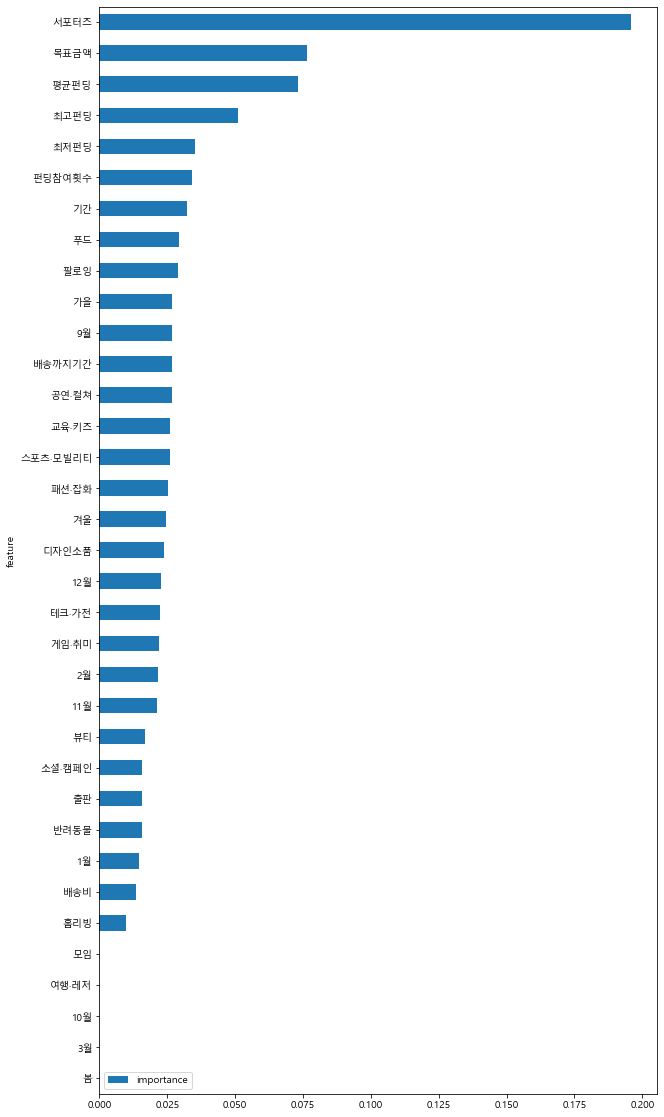

In [317]:
# 컬럼 별 영향력 
feature = pd.DataFrame()
feature['feature'] = X_train.columns
feature['importance'] = model_xgb.feature_importances_

feature.sort_values(by=['importance'],ascending=True,inplace = True)
feature.set_index('feature', inplace=True)
print(feature)
feature.plot(kind='barh', figsize =(10,20))